In [ ]:
#!Begin

# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for the MLA course

by [*lufer*](mailto:lufer@ipca.pt)

---



# ML Modelling - Part VIII - Ensemble Machine Learning Models (Exercise)
\
**Contents**:

1. **Ensamble model using Boosting technique**
2. **Solution of the Exercise 4**

\
Tasks to be performed:
1. Load the data
2. Split the data into training and testing sets
3. Build a Decision Tree Classifier and get its Accuracy Score
4. Build an AdaBoost Model and get its Accuracy Score
5. Compare the Accuracy Scores



### Load Dataset

In [1]:
#see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html
from sklearn.datasets import load_breast_cancer

#Load the breast cancer dataset
x, y = load_breast_cancer(return_X_y=True)

### Split the data into training and testing sets

In [2]:
from sklearn.model_selection import train_test_split

#Split the dataset into 70% training set and 30% testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,   random_state=23)

### Build a Decision Tree Classifier and get its Accuracy Score

In [3]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Train a Decision tree classifier
dtree = DecisionTreeClassifier(max_depth=1, random_state=23)
dtree.fit(x_train,y_train)
dt_pred = dtree.predict(x_test)

dt_acc = round(accuracy_score(y_test,dt_pred),3)
print(f"Decision Tree Classifier Accuracy Score: ", dt_acc)

Decision Tree Classifier Accuracy Score:  0.924


### Build an AdaBoost Model and get its Accuracy Score

The AdaBoost ensemble model is initialized with the following parameters:

* base_estimator = Decision Tree (default)
* n_estimators = 50 (create 50 samples to train 50 decision tree base models)
* learning_rate = 0.6 (shrinks the contribution of each learner model by the value given)


```
Note: AdaBoost explores Squencial Decison Trees where  each tree adjusts its weights based on prior knowledge of accuracies. Hence, the training in such technique is a sequential (rather than parallel - like happens in Bagging Random Forest) process.
```



In [4]:
from sklearn.ensemble import AdaBoostClassifier

#AdaBoost Model using Decision Tree Classifier
ada = AdaBoostClassifier(n_estimators=50,learning_rate=0.6)
ada.fit(x_train,y_train)
ada_pred = ada.predict(x_test)

ada_acc = round(accuracy_score(y_test,ada_pred),3)
print(f"Decision Tree AdaBoost Model Accuracy Score: ", ada_acc)


Decision Tree AdaBoost Model Accuracy Score:  0.982


### Compare the Accuracy Scores

<BarContainer object of 2 artists>

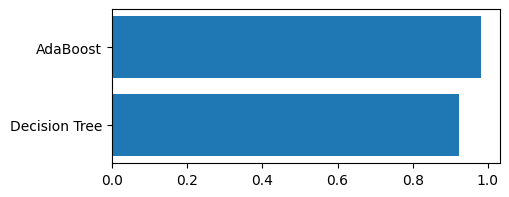

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#Compare the Accuracy Scores through Visualization
plt.figure(figsize=(5,2))
plt.barh(np.arange(2),[dt_acc,ada_acc],
         tick_label=['Decision Tree','AdaBoost'])

*Observation*:  AdaBoost improves the performance and accuracy of the above Decision Tree Classifier.

In [ ]:
#!End